# Advanced Natural Language Processing

##Importing all the required libraries


In [ ]:
import numpy as np
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('genesis')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
!pip install contractions
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.corpus import genesis
# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')  # <--- This is the new download
import random
import re
import time
import string
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from collections import defaultdict
from multiprocessing import Pool
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# To read the file
df_train = pd.read_csv('propaganda_train.tsv', delimiter='\t')
df2_test = pd.read_csv('propaganda_val.tsv', delimiter='\t')
print(df_train.head())


            label                                  tagged_in_context
0  not_propaganda         No, <BOS> he <EOS> will not be confirmed. 
1  not_propaganda  This declassification effort <BOS> won’t make ...
2     flag_waving  The Obama administration misled the <BOS> Amer...
3  not_propaganda  “It looks like we’re capturing the demise of t...
4  not_propaganda           <BOS> Location: Westerville, Ohio <EOS> 


In [ ]:
print(df2_test.head())

                       label  \
0             not_propaganda   
1  causal_oversimplification   
2   appeal_to_fear_prejudice   
3             not_propaganda   
4                 repetition   

                                   tagged_in_context  
0  On average, between 300 and 600 infections are...  
1  Mostly because <BOS> the country would not las...  
2  Lyndon Johnson <BOS> gets Earl Warren and Sen....  
3           <BOS> You <EOS> may opt out at anytime.   
4  It must be exacted from him directly in order ...  


### Data Pre-Processing

In [ ]:
# Create a  copy of the training and test dataframes
df = df_train.copy(deep=True)
df2 = df2_test.copy(deep=True)

In [ ]:
# Show the first 10 rows of the copied training data
print(df.head(10))

             label                                  tagged_in_context
0   not_propaganda         No, <BOS> he <EOS> will not be confirmed. 
1   not_propaganda  This declassification effort <BOS> won’t make ...
2      flag_waving  The Obama administration misled the <BOS> Amer...
3   not_propaganda  “It looks like we’re capturing the demise of t...
4   not_propaganda           <BOS> Location: Westerville, Ohio <EOS> 
5  loaded_language  Hitler <BOS> annihilated <EOS> 400,000 Germans...
6   not_propaganda  A federal judge on Monday ordered U.S. immigra...
7   not_propaganda  <BOS> Kirstjen Nielsen (@SecNielsen) <EOS> Nov...
8            doubt  As noted above, at this point literally every ...
9   not_propaganda  Britain doesn't need more hate even just for a...


In [ ]:
print(df2.head(10))

                       label  \
0             not_propaganda   
1  causal_oversimplification   
2   appeal_to_fear_prejudice   
3             not_propaganda   
4                 repetition   
5      name_calling,labeling   
6            loaded_language   
7             not_propaganda   
8                flag_waving   
9                      doubt   

                                   tagged_in_context  
0  On average, between 300 and 600 infections are...  
1  Mostly because <BOS> the country would not las...  
2  Lyndon Johnson <BOS> gets Earl Warren and Sen....  
3           <BOS> You <EOS> may opt out at anytime.   
4  It must be exacted from him directly in order ...  
5  Is it any wonder that priests and laity alike ...  
6  Health workers have been asked to work with co...  
7       The Best of <BOS> Jacob <EOS> G. Hornberger   
8  Trump began his remarks by setting out <BOS> I...  
9  <BOS> Now, the pope’s reply to my testimony wa...  


In [ ]:
def preprocess_text(text):
    def part_of_speech(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    text = [contractions.fix(word) for word in text.split()]
    text = ' '.join(map(str, text))

    # Tokenization
    text = word_tokenize(text)

    # Remove extra words
    extras = ['BOS','EOS','”','“']
    text = [word for word in text if word not in extras]

    # Lowercase
    text = [word.lower() for word in text]

    # Remove punctuation
    punctuation = string.punctuation
    text = [word for word in text if word not in punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]

    # POS tagging and lemmatization
    text = nltk.pos_tag(text)
    text = [(word, part_of_speech(pos_tag)) for (word, pos_tag) in text]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word, tag) for word, tag in text]

    # Join tokens into a string
    return ' '.join(text)

##reference
#Above codes are written by referring this website. https://kaifshaikhhhh.medium.com/easiest-way-to-pre-process-text-for-natural-language-processing-e0f32f338b5a

In [ ]:

df['processed_text'] = df['tagged_in_context'].apply(preprocess_text)
print(df.head())

            label                                  tagged_in_context  \
0  not_propaganda         No, <BOS> he <EOS> will not be confirmed.    
1  not_propaganda  This declassification effort <BOS> won’t make ...   
2     flag_waving  The Obama administration misled the <BOS> Amer...   
3  not_propaganda  “It looks like we’re capturing the demise of t...   
4  not_propaganda           <BOS> Location: Westerville, Ohio <EOS>    

                                      processed_text  
0                                            confirm  
1  declassification effort make thing bad preside...  
2  obama administration mislead american people c...  
3  look like capture demise dark vortex different...  
4                          location westerville ohio  


In [ ]:
df2['processed_text'] = df2['tagged_in_context'].apply(preprocess_text)
print(df2.head())

                       label  \
0             not_propaganda   
1  causal_oversimplification   
2   appeal_to_fear_prejudice   
3             not_propaganda   
4                 repetition   

                                   tagged_in_context  \
0  On average, between 300 and 600 infections are...   
1  Mostly because <BOS> the country would not las...   
2  Lyndon Johnson <BOS> gets Earl Warren and Sen....   
3           <BOS> You <EOS> may opt out at anytime.    
4  It must be exacted from him directly in order ...   

                                      processed_text  
0  average 300 600 infection record every year am...  
1  mostly country would last long without outside...  
2  lyndon johnson get earl warren sen. richard ru...  
3                                    may opt anytime  
4  must exact directly order vilify humiliate isl...  


In [ ]:
#I am categorizing all data into two groups: 'propaganda' and 'not_propaganda'
def rename_labels(label):
    if label != 'not_propaganda':
        return 'propaganda'
    else:
        return label
#applying on train data
df['label'] = df['label'].apply(rename_labels)
df.head(10)

,label,tagged_in_context,processed_text
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed.",confirm
1,not_propaganda,This declassification effort <BOS> won’t make ...,declassification effort make thing bad preside...
2,propaganda,The Obama administration misled the <BOS> Amer...,obama administration mislead american people c...
3,not_propaganda,“It looks like we’re capturing the demise of t...,look like capture demise dark vortex different...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>",location westerville ohio
5,propaganda,"Hitler <BOS> annihilated <EOS> 400,000 Germans...","hitler annihilate 400,000 german handicap suff..."
6,not_propaganda,A federal judge on Monday ordered U.S. immigra...,federal judge monday order you.s immigration o...
7,not_propaganda,<BOS> Kirstjen Nielsen (@SecNielsen) <EOS> Nov...,kirstjen nielsen secnielsen november 19 2018
8,propaganda,"As noted above, at this point literally every ...",note point literally every piece so-called evi...
9,not_propaganda,Britain doesn't need more hate even just for a...,britain need hate even day ''


In [ ]:
#applying it on test data
df2['label'] = df2['label'].apply(rename_labels)
df2.head()

,label,tagged_in_context,processed_text
0,not_propaganda,"On average, between 300 and 600 infections are...",average 300 600 infection record every year am...
1,propaganda,Mostly because <BOS> the country would not las...,mostly country would last long without outside...
2,propaganda,Lyndon Johnson <BOS> gets Earl Warren and Sen....,lyndon johnson get earl warren sen. richard ru...
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.,may opt anytime
4,propaganda,It must be exacted from him directly in order ...,must exact directly order vilify humiliate isl...


In [ ]:
print(df['label'].unique())

['not_propaganda' 'propaganda']


In [ ]:
# Print size of the training data
print(f"Size of training data: {len(df_train)}")
print(f"Size of testing data: {len(df2_test)}")

Size of training data: 2414
Size of testing data: 580


In [ ]:
# Compute the proportions of the training and testing data
train_data_proportion = len(df_train) / (len(df_train) + len(df2_test)) * 100
test_data_proportion = len(df2_test) / (len(df_train) + len(df2_test)) * 100

# Print the proportions
print(f'Training data proportion: {round(train_data_proportion)}%')
print(f'Testing data proportion: {round(test_data_proportion)}%')


Training data proportion: 81%
Testing data proportion: 19%


Our dataset is split such that approximately 80% of the data is used for training and 20% is used for testing.

## Task-1

In Task 1, we will explore and evaluate atleast two methods to identify wheahter a statement contains propoganda. Approach 1 will involve text probability based on n-gram models, while Approach 2 will focus on classification using uncontextualised word embedding methods, such as word2vec.

###Approach 1 : Multinomial Naive Bayes Classifier(unigrams,bigrams and trigrams)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt



In [ ]:
# Define the TfidfVectorizer with desired parameters
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Transform the training data
X_train = vectorizer.fit_transform(df['processed_text'])

# Transform the testing data
X_test = vectorizer.transform(df2['processed_text'])

# Create and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, df['label'])

# Make predictions
predictions = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(df2['label'], predictions)
print(f'Accuracy: {accuracy}')

# Generate and print the classification report
report = classification_report(df2['label'], predictions)
print(f'Multinomial Naive Bayes Classifier Report:\n{report}')

Accuracy: 0.6741379310344827
Multinomial Naive Bayes Classifier Report:
                precision    recall  f1-score   support

not_propaganda       0.80      0.50      0.61       301
    propaganda       0.61      0.86      0.72       279

      accuracy                           0.67       580
     macro avg       0.71      0.68      0.67       580
  weighted avg       0.71      0.67      0.66       580



In [ ]:
def evaluate_model(alpha, ngram_range, training_data, testing_data):
    # Define the TfidfVectorizer with the specified ngram_range
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)

    # Transform the training data
    X_train = vectorizer.fit_transform(training_data['processed_text'])

    # Transform the testing data
    X_test = vectorizer.transform(testing_data['processed_text'])

    # Create and train the Multinomial Naive Bayes classifier with the specified alpha value
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, training_data['label'])

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate and return the accuracy
    accuracy = accuracy_score(testing_data['label'], predictions)
    return accuracy

# Define the hyperparameters to evaluate
alphas = [0.1, 0.5, 1, 3, 7, 10]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]

# Iterate over the hyperparameters and evaluate the model
for alpha in alphas:
    for ngram_range in ngram_ranges:
        accuracy = evaluate_model(alpha, ngram_range, df, df2)
        print(f"Accuracy with alpha={alpha} and ngram_range={ngram_range}: {accuracy}")

##Reference
##the code used above is available in this website: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Accuracy with alpha=0.1 and ngram_range=(1, 1): 0.6706896551724137
Accuracy with alpha=0.1 and ngram_range=(1, 2): 0.6706896551724137
Accuracy with alpha=0.1 and ngram_range=(1, 3): 0.6689655172413793
Accuracy with alpha=0.5 and ngram_range=(1, 1): 0.6775862068965517
Accuracy with alpha=0.5 and ngram_range=(1, 2): 0.6741379310344827
Accuracy with alpha=0.5 and ngram_range=(1, 3): 0.6706896551724137
Accuracy with alpha=1 and ngram_range=(1, 1): 0.6810344827586207
Accuracy with alpha=1 and ngram_range=(1, 2): 0.6706896551724137
Accuracy with alpha=1 and ngram_range=(1, 3): 0.6741379310344827
Accuracy with alpha=3 and ngram_range=(1, 1): 0.6603448275862069
Accuracy with alpha=3 and ngram_range=(1, 2): 0.6482758620689655
Accuracy with alpha=3 and ngram_range=(1, 3): 0.6448275862068965
Accuracy with alpha=7 and ngram_range=(1, 1): 0.6362068965517241
Accuracy with alpha=7 and ngram_range=(1, 2): 0.6275862068965518
Accuracy with alpha=7 and ngram_range=(1, 3): 0.6258620689655172
Accuracy with

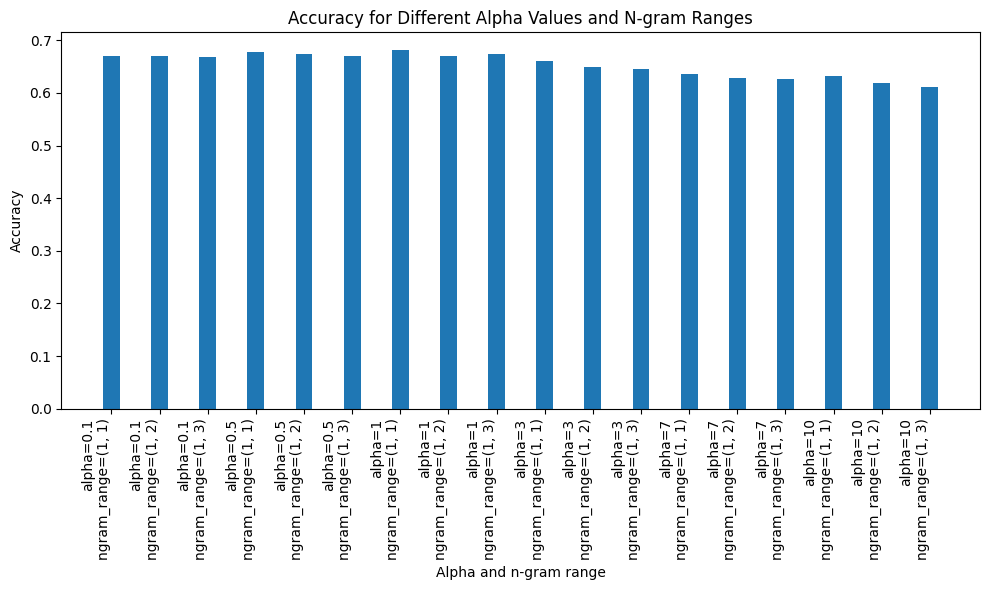

In [ ]:
# Define the alpha values and n-gram ranges
alphas = [0.1, 0.5, 1, 3, 7, 10]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]

# Extract the accuracy values
accuracies = [
    0.6706896551724137, 0.6706896551724137, 0.6689655172413793,
    0.6775862068965517, 0.6741379310344827, 0.6706896551724137,
    0.6810344827586207, 0.6706896551724137, 0.6741379310344827,
    0.6603448275862069, 0.6482758620689655, 0.6448275862068965,
    0.6362068965517241, 0.6275862068965518, 0.6258620689655172,
    0.6327586206896552, 0.6189655172413793, 0.6120689655172413
]

# Create a list of labels for plotting
labels = [f"alpha={alpha}\nngram_range={ngram_range}" for alpha in alphas for ngram_range in ngram_ranges]

# Plot the accuracy values as columns
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, accuracies, width)
plt.xticks(x, labels, rotation=90, ha='right')  # Rotate the labels by 90 degrees
plt.xlabel('Alpha and n-gram range')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Alpha Values and N-gram Ranges')
plt.tight_layout()
plt.show()


In [ ]:
# Define the alpha values and n-gram ranges
alphas = [0.1, 0.5, 1, 3, 7, 10]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]

# Extract the accuracy values
accuracies = [
    0.6706896551724137, 0.6706896551724137, 0.6689655172413793,
    0.6775862068965517, 0.6741379310344827, 0.6706896551724137,
    0.6810344827586207, 0.6706896551724137, 0.6741379310344827,
    0.6603448275862069, 0.6482758620689655, 0.6448275862068965,
    0.6362068965517241, 0.6275862068965518, 0.6258620689655172,
    0.6327586206896552, 0.6189655172413793, 0.6120689655172413
]

# Create a DataFrame with the accuracy data
data = {
    'Alpha': alphas * len(ngram_ranges),
    'N-gram Range': [f"{ngram_range[0]}-{ngram_range[1]}" for ngram_range in ngram_ranges * len(alphas)],
    'Accuracy': accuracies
}
dataframe = pd.DataFrame(data)

# Display the DataFrame
print(dataframe)


    Alpha N-gram Range  Accuracy
0     0.1          1-1  0.670690
1     0.5          1-2  0.670690
2     1.0          1-3  0.668966
3     3.0          1-1  0.677586
4     7.0          1-2  0.674138
5    10.0          1-3  0.670690
6     0.1          1-1  0.681034
7     0.5          1-2  0.670690
8     1.0          1-3  0.674138
9     3.0          1-1  0.660345
10    7.0          1-2  0.648276
11   10.0          1-3  0.644828
12    0.1          1-1  0.636207
13    0.5          1-2  0.627586
14    1.0          1-3  0.625862
15    3.0          1-1  0.632759
16    7.0          1-2  0.618966
17   10.0          1-3  0.612069


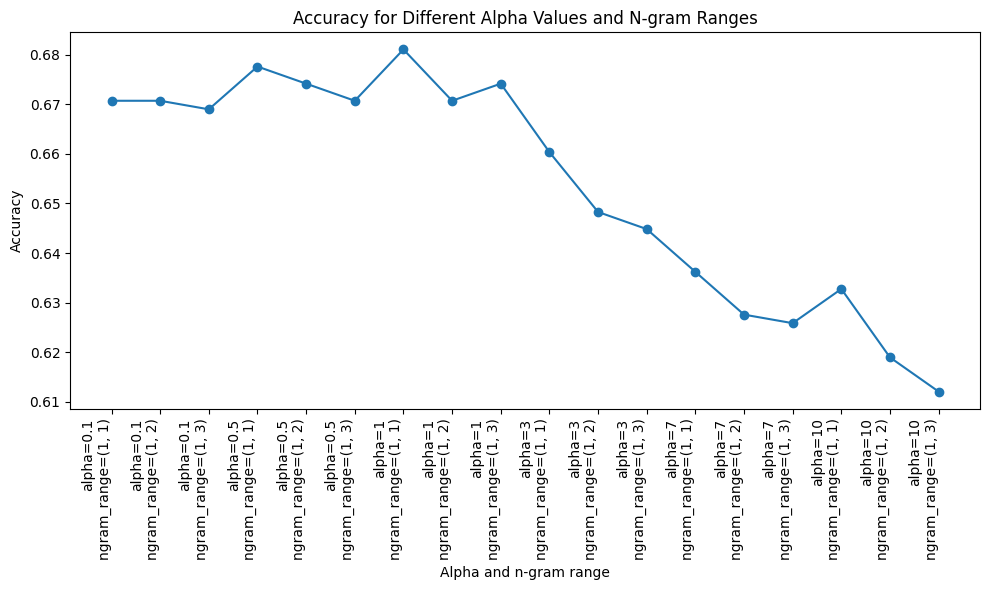

In [ ]:
# Define the alpha values and n-gram ranges
alphas = [0.1, 0.5, 1, 3, 7, 10]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]

# Extract the accuracy values
accuracies = [
    0.6706896551724137, 0.6706896551724137, 0.6689655172413793,
    0.6775862068965517, 0.6741379310344827, 0.6706896551724137,
    0.6810344827586207, 0.6706896551724137, 0.6741379310344827,
    0.6603448275862069, 0.6482758620689655, 0.6448275862068965,
    0.6362068965517241, 0.6275862068965518, 0.6258620689655172,
    0.6327586206896552, 0.6189655172413793, 0.6120689655172413
]

# Create a list of labels for plotting
labels = [f"alpha={alpha}\nngram_range={ngram_range}" for alpha in alphas for ngram_range in ngram_ranges]

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(labels, accuracies, marker='o')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Alpha and n-gram range')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Alpha Values and N-gram Ranges')
plt.tight_layout()
plt.show()


:


###Approach 2 : Logistic regression using Word2vec

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV



In [ ]:
# Download and load the pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Function that uses word embeddings to convert a sentence into a vector representation
def word_embedding(sentence, model):
    words = sentence.split()
    embedding = np.zeros((model.vector_size,))
    count = 0
    for word in words:
        if word in model.key_to_index:
            embedding += model.get_vector(word)
            count += 1
    if count > 0:
        embedding /= count
    return embedding
##reference
## the code written above is available in this website : https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [ ]:
# Transform the text data into word embeddings
Em_X_train = [word_embedding(sentence, word2vec_model) for sentence in df['processed_text']]
Em_X_test = [word_embedding(sentence, word2vec_model) for sentence in df2['processed_text']]
Em_y_train = df['label']
Em_y_test = df2['label']

# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(Em_X_train, Em_y_train)

# Make predictions on the test set
predictions = logreg.predict(Em_X_test)

# Compute accuracy
accuracy = accuracy_score(Em_y_test, predictions)
print(f'Accuracy: {accuracy}')

# Generate and print the classification report
report = classification_report(Em_y_test, predictions)
print(f'Logistic Regression Classifier Report:\n{report}')


Accuracy: 0.7034482758620689
Logistic Regression Classifier Report:
                precision    recall  f1-score   support

not_propaganda       0.72      0.69      0.71       301
    propaganda       0.68      0.72      0.70       279

      accuracy                           0.70       580
     macro avg       0.70      0.70      0.70       580
  weighted avg       0.70      0.70      0.70       580



In [ ]:
# First, tune 'C' values while keeping 'penalty' fixed
param_grid_C = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Fix penalty to 'l2'
    'solver': ['liblinear', 'newton-cg', 'lbfgs']
}

logreg_C_tuning = LogisticRegression(max_iter=600)
grid_search_C = GridSearchCV(logreg_C_tuning, param_grid_C, cv=5)
grid_search_C.fit(Em_X_train, Em_y_train)

# Get the best model and its hyperparameters for 'C' tuning
best_model_C = grid_search_C.best_estimator_
best_params_C = grid_search_C.best_params_

# Next, tune 'penalty' values while keeping 'C' fixed
param_grid_penalty = {
    'C': [best_params_C['C']],  # Fix 'C' to the best value from 'C' tuning
    'penalty': ['l1', 'l2'],  # Tune both 'l1' and 'l2' penalties
    'solver': ['liblinear']
}

logreg_penalty_tuning = LogisticRegression(max_iter=600)
grid_search_penalty = GridSearchCV(logreg_penalty_tuning, param_grid_penalty, cv=5)
grid_search_penalty.fit(Em_X_train, Em_y_train)

# Get the best model and its hyperparameters for 'penalty' tuning
best_model_penalty = grid_search_penalty.best_estimator_
best_params_penalty = grid_search_penalty.best_params_

# Print the accuracy scores for each 'C' parameter configuration
results_C = grid_search_C.cv_results_
param_configs_C = results_C['params']
mean_test_accuracy_C = results_C['mean_test_score']
std_test_accuracy_C = results_C['std_test_score']

print("C Hyperparameter Tuning:")
for config, mean_score, std_score in zip(param_configs_C, mean_test_accuracy_C, std_test_accuracy_C):
    print(f"Accuracy: {mean_score:.6f}, Parameters: {config} " )
##Reference
##the code used above is available in this website: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
##the hyperparameters  : https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

C Hyperparameter Tuning:
Accuracy: 0.677304, Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.684353, Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'} 
Accuracy: 0.684353, Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'} 
Accuracy: 0.692639, Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.693054, Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} 
Accuracy: 0.693054, Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'} 
Accuracy: 0.681455, Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.682283, Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'} 
Accuracy: 0.682283, Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} 
Accuracy: 0.680625, Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.681039, Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'} 
Accuracy: 0.681039, Parameters: {'C': 10, 'penalty': 'l2', 'solver':

In [ ]:
#  the accuracy scores for each 'penalty' parameter configuration
results_penalty = grid_search_penalty.cv_results_
param_configs_penalty = results_penalty['params']
mean_test_accuracy_penalty = results_penalty['mean_test_score']
std_test_accuracy_penalty = results_penalty['std_test_score']

print("\nPenalty Hyperparameter Tuning:")
for config, mean_score, std_score in zip(param_configs_penalty, mean_test_accuracy_penalty, std_test_accuracy_penalty):
    print(f"Accuracy: {mean_score:.6f}, Parameters: {config},  ")


Penalty Hyperparameter Tuning:
Accuracy: 0.612670, Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},  
Accuracy: 0.692639, Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},  


## TASK 2

In task 2 we have to build and evaluate atleast two approaches to classify the propoganda technique used in a given snippet or span of text. In the first approach we did Neural Language Models(GRU) and second approach we did Pre-trained Language models(BERT).



###Data Pre-processing

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
dft=df_train.copy(deep=True)
dft2=df2_test.copy(deep=True)

In [ ]:
dft.head()

,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


In [ ]:
dft2.head()

,label,tagged_in_context
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.
4,repetition,It must be exacted from him directly in order ...


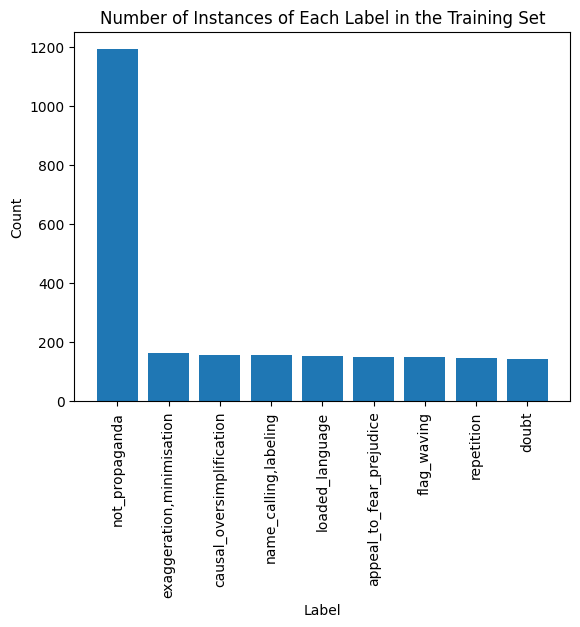

In [ ]:
# Get the counts of each label in the training set
label_counts = dft['label'].value_counts()

# Create a bar chart of the label counts
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label in the Training Set')
plt.xticks(rotation=90)
# Show the plot
plt.show()


In [ ]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def extract_word_span(tagged_in_context):
    bos_index = tagged_in_context.find("<BOS>") + len("<BOS>")
    eos_index = tagged_in_context.find("<EOS>")
    word_span = tagged_in_context[bos_index:eos_index].strip()
    return word_span

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words]
    return " ".join(words)

# Apply the extraction function
dft["tagged_in_context"] = dft["tagged_in_context"].apply(extract_word_span)
dft2["tagged_in_context"] = dft2["tagged_in_context"].apply(extract_word_span)

# Apply the preprocessing function
dft["tagged_in_context"] = dft["tagged_in_context"].apply(preprocess_text)
dft2["tagged_in_context"] = dft2["tagged_in_context"].apply(preprocess_text)

# Filter the dataframes to remove 'not_propaganda' entries
dft = dft[dft["label"] != "not_propaganda"]
dft2 = dft2[dft2["label"] != "not_propaganda"]


In [ ]:
dft.head(10)

,label,tagged_in_context
2,flag_waving,american people
5,loaded_language,annihilate
8,doubt,evidence
10,"name_calling,labeling",hateful conduct
12,appeal_to_fear_prejudice,point to iran s position itself for more aggre...
14,repetition,more
18,doubt,but who authorize this strategic commitment
19,causal_oversimplification,the only reason why there be general interest ...
20,doubt,we must ask ourselves why this hasn t happen
21,loaded_language,sneaky


In [ ]:
dft2.head()

,label,tagged_in_context
1,causal_oversimplification,the country would not last long without an out...
2,appeal_to_fear_prejudice,get earl warren and richard russel to join the...
4,repetition,infidel
5,"name_calling,labeling",the gay lifestyle
6,loaded_language,devastate community


In [ ]:
# Create copies of dft and dft2 named dftcopy and dftcopy2
dftcopy = dft.copy()
dftcopy2 = dft2.copy()


## Approach 1: GRU Ensemble

In [ ]:
dftcopy.head()

,label,tagged_in_context
2,flag_waving,american people
5,loaded_language,annihilate
8,doubt,evidence
10,"name_calling,labeling",hateful conduct
12,appeal_to_fear_prejudice,point to iran s position itself for more aggre...


In [ ]:
unique_labels = dftcopy['label'].unique()
print(unique_labels)


['flag_waving' 'loaded_language' 'doubt' 'name_calling,labeling'
 'appeal_to_fear_prejudice' 'repetition' 'causal_oversimplification'
 'exaggeration,minimisation']


In [ ]:
unique_labels_t = dftcopy2['label'].unique()
print(unique_labels_t)


['causal_oversimplification' 'appeal_to_fear_prejudice' 'repetition'
 'name_calling,labeling' 'loaded_language' 'flag_waving' 'doubt'
 'exaggeration,minimisation']


In [ ]:
# Import necessary modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dftcopy['tagged_in_context'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2841 unique tokens.


In [ ]:
# Convert text data into sequences
X_train = tokenizer.texts_to_sequences(dftcopy['tagged_in_context'].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)

X_test = tokenizer.texts_to_sequences(dftcopy2['tagged_in_context'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Convert categorical labels to numbers
Y_train = pd.get_dummies(dftcopy['label']).values
Y_test = pd.get_dummies(dftcopy2['label']).values


In [ ]:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# Prepare embedding matrix
# Prepare embedding matrix
num_words = min(MAX_NB_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros.
        embedding_matrix[i] = embedding_vector




Found 196916 word vectors.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the models
def create_model1():
    model = Sequential()
    model.add(Embedding(num_words,
                        EMBEDDING_DIM,
                        embeddings_initializer=Constant(embedding_matrix),
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(GRU(128, return_sequences=True))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(Y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_model2():
    model = Sequential()
    model.add(Embedding(num_words,
                        EMBEDDING_DIM,
                        embeddings_initializer=Constant(embedding_matrix),
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(GRU(64, return_sequences=True))
    model.add(GRU(32))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(Y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_model3():
    model = Sequential()
    model.add(Embedding(num_words,
                        EMBEDDING_DIM,
                        embeddings_initializer=Constant(embedding_matrix),
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(GRU(256, return_sequences=True))
    model.add(GRU(128))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(Y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate and train the models
model1 = create_model1()
model2 = create_model2()
model3 = create_model3()




In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history1 = model1.fit(X_train, Y_train, epochs=35, batch_size=64, validation_split=0.1, callbacks=[early_stop])
history2 = model2.fit(X_train, Y_train, epochs=35, batch_size=64, validation_split=0.1, callbacks=[early_stop])
history3 = model3.fit(X_train, Y_train, epochs=35, batch_size=64, validation_split=0.1, callbacks=[early_stop])

# Make predictions with each model
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

# Average the predictions
predictions_avg = (predictions1 + predictions2 + predictions3) / 3

# Convert averaged predictions to class labels
predictions_label = np.argmax(predictions_avg, axis=1)

# Calculate accuracy
accuracy = np.mean(predictions_label == np.argmax(Y_test, axis=1))

print('Ensemble Accuracy: {:0.3f}'.format(accuracy))
##Reference
## The code used in this is available in this website:https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/

Epoch 1/35
18/18 [==============================] - 17s 151ms/step - loss: 2.0418 - accuracy: 0.1609 - val_loss: 1.9781 - val_accuracy: 0.2520
Epoch 2/35
18/18 [==============================] - 1s 41ms/step - loss: 1.9195 - accuracy: 0.2691 - val_loss: 1.8373 - val_accuracy: 0.3252
Epoch 3/35
18/18 [==============================] - 1s 40ms/step - loss: 1.7687 - accuracy: 0.3355 - val_loss: 1.6923 - val_accuracy: 0.3577
Epoch 4/35
18/18 [==============================] - 1s 37ms/step - loss: 1.6438 - accuracy: 0.3682 - val_loss: 1.5555 - val_accuracy: 0.4065
Epoch 5/35
18/18 [==============================] - 1s 40ms/step - loss: 1.5398 - accuracy: 0.4082 - val_loss: 1.4678 - val_accuracy: 0.4065
Epoch 6/35
18/18 [==============================] - 1s 48ms/step - loss: 1.4702 - accuracy: 0.4564 - val_loss: 1.4541 - val_accuracy: 0.4228
Epoch 7/35
18/18 [==============================] - 1s 52ms/step - loss: 1.4158 - accuracy: 0.4636 - val_loss: 1.3874 - val_accuracy: 0.4797
Epoch 8/35


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Average the predictions
predictions_avg = (predictions1 + predictions2 + predictions3) / 3

# Convert averaged predictions to class labels
predictions_label = np.argmax(predictions_avg, axis=1)

# Get the class labels from your original data
unique_labels = sorted(dftcopy['label'].unique())  # Replace 'label' with the actual column name containing class labels

# Sort the unique class labels (if not already sorted)
class_names = sorted(unique_labels)

# Convert the one-hot encoded test labels back to class labels
Y_test_label = np.argmax(Y_test, axis=1)

# Print the classification report
print(classification_report(Y_test_label, predictions_label, target_names=class_names))


                           precision    recall  f1-score   support

 appeal_to_fear_prejudice       0.48      0.56      0.52        43
causal_oversimplification       0.42      0.55      0.48        31
                    doubt       0.40      0.21      0.28        38
exaggeration,minimisation       0.31      0.32      0.32        28
              flag_waving       0.81      0.64      0.71        39
          loaded_language       0.57      0.35      0.43        37
    name_calling,labeling       0.44      0.48      0.46        31
               repetition       0.33      0.53      0.40        32

                 accuracy                           0.46       279
                macro avg       0.47      0.46      0.45       279
             weighted avg       0.48      0.46      0.46       279



In [ ]:
# Step 1: Get the column names from the one-hot encoded DataFrame
one_hot_encoded_df = pd.get_dummies(dftcopy['label'])
column_names = one_hot_encoded_df.columns

# Step 2: Extract the class names from the column names
class_names = list(column_names)

# Print the class names to check the order
print(class_names)


['appeal_to_fear_prejudice', 'causal_oversimplification', 'doubt', 'exaggeration,minimisation', 'flag_waving', 'loaded_language', 'name_calling,labeling', 'repetition']


In [ ]:
!pip install scikeras


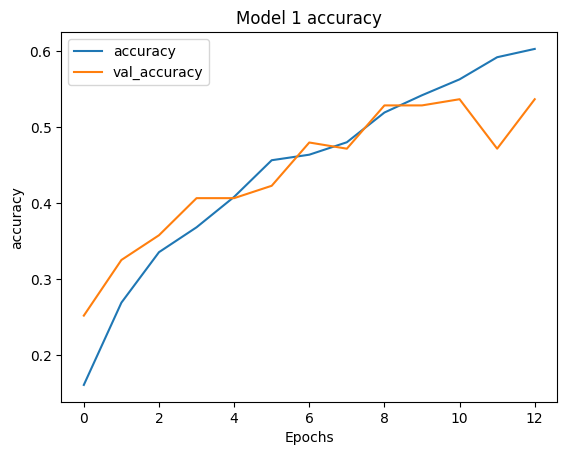

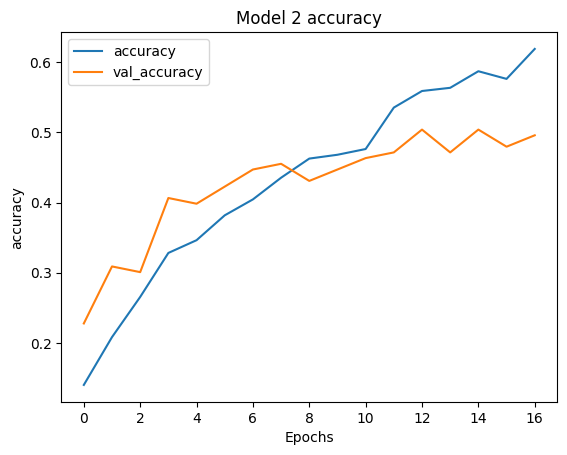

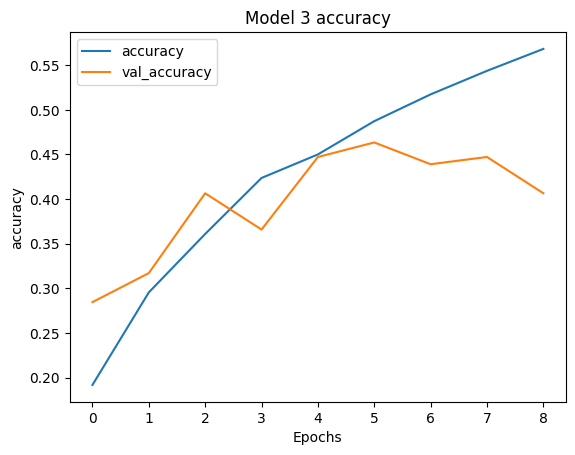

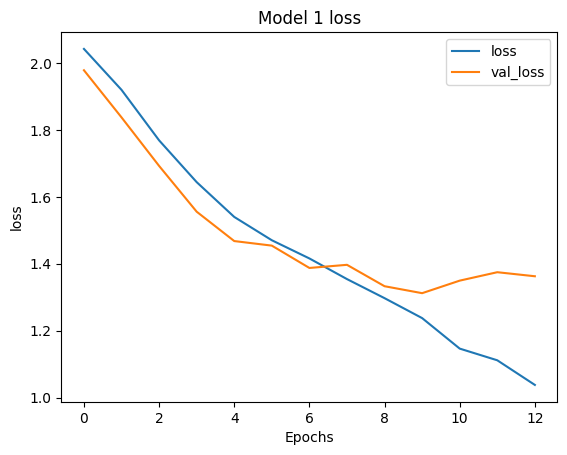

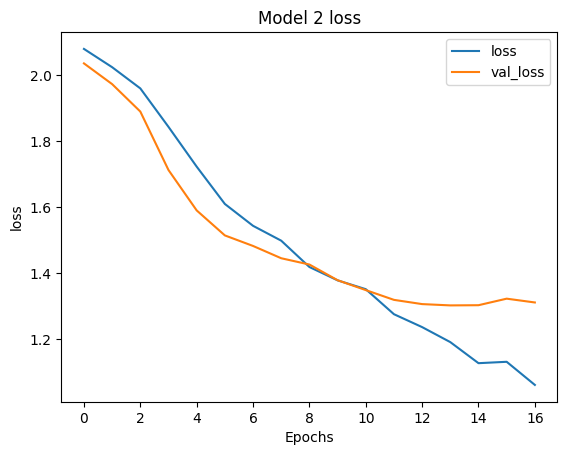

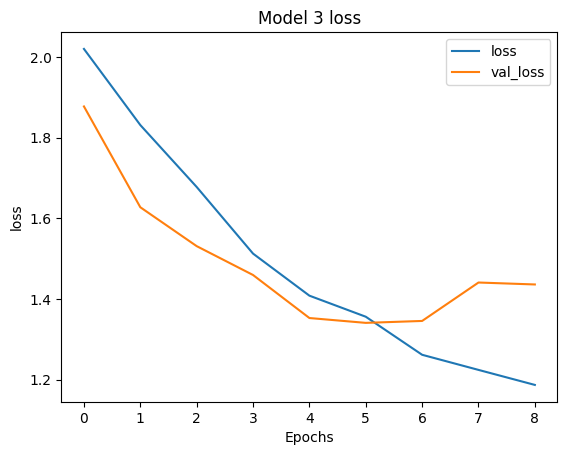

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot accuracy and loss
def plot_graphs(history, string, model_num):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(f'Model {model_num} {string}')
    plt.show()

# Plot training & validation accuracy values for Model 1
plot_graphs(history1, 'accuracy', 1)

# Plot training & validation accuracy values for Model 2
plot_graphs(history2, 'accuracy', 2)

# Plot training & validation accuracy values for Model 3
plot_graphs(history3, 'accuracy', 3)

# Plot training & validation loss values for Model 1
plot_graphs(history1, 'loss', 1)

# Plot training & validation loss values for Model 2
plot_graphs(history2, 'loss', 2)

# Plot training & validation loss values for Model 3
plot_graphs(history3, 'loss', 3)


##Approach 2: BERT

In [ ]:
!pip install transformers


In [ ]:
import transformers
from transformers import AutoTokenizer, TFBertModel
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import warnings
from sklearn.metrics import classification_report

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 2 to 2413
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              1223 non-null   object
 1   tagged_in_context  1223 non-null   object
dtypes: object(2)
memory usage: 28.7+ KB


In [ ]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 1 to 579
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              279 non-null    object
 1   tagged_in_context  279 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


In [ ]:
dft['label'].value_counts()

exaggeration,minimisation    164
causal_oversimplification    158
name_calling,labeling        157
loaded_language              154
appeal_to_fear_prejudice     151
flag_waving                  148
repetition                   147
doubt                        144
Name: label, dtype: int64

In [ ]:
unique_labels = dft['label'].unique()
print(unique_labels)


['flag_waving' 'loaded_language' 'doubt' 'name_calling,labeling'
 'appeal_to_fear_prejudice' 'repetition' 'causal_oversimplification'
 'exaggeration,minimisation']


In [ ]:
unique_labels = dft2['label'].unique()
print(unique_labels)


['causal_oversimplification' 'appeal_to_fear_prejudice' 'repetition'
 'name_calling,labeling' 'loaded_language' 'flag_waving' 'doubt'
 'exaggeration,minimisation']


In [ ]:
encoded_dict = {'exaggeration,minimisation': 0, 'causal_oversimplification': 1, 'name_calling,labeling': 2,
                'loaded_language': 3, 'appeal_to_fear_prejudice': 4, 'flag_waving': 5, 'repetition': 6, 'doubt': 7}

dft['label'] = dft.label.map(encoded_dict)
dft2['label'] = dft2.label.map(encoded_dict)

# Convert to one-hot encoding
y_train = to_categorical(dft.label)
y_test = to_categorical(dft2.label)


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
x_train = tokenizer(
    text=dft.tagged_in_context.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

x_test = tokenizer(
    text=dft2.tagged_in_context.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


In [ ]:
# Define the model
max_len = 70
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(8,activation = 'sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

# Use learning rate schedule
initial_learning_rate = 5e-5
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)

# Use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Compile the model
optimizer = Adam(learning_rate=lr_schedule)
loss = CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('accuracy')
model.compile(optimizer = optimizer, loss = loss, metrics = metric)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                            

In [ ]:
# Train the model
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test
    ),
    epochs=15,
    batch_size=36,
    callbacks=[early_stopping]
)
##Reference
##The code used in this available in this website https://www.analyticsvidhya.com/blog/2021/12/multiclass-classification-using-transformers/

Epoch 1/15
34/34 [==============================] - 117s 488ms/step - loss: 1.8607 - accuracy: 0.2625 - val_loss: 1.6381 - val_accuracy: 0.3297
Epoch 2/15
34/34 [==============================] - 12s 367ms/step - loss: 1.4035 - accuracy: 0.4644 - val_loss: 1.3340 - val_accuracy: 0.4982
Epoch 3/15
34/34 [==============================] - 12s 364ms/step - loss: 1.0170 - accuracy: 0.6533 - val_loss: 1.3176 - val_accuracy: 0.5412
Epoch 4/15
34/34 [==============================] - 10s 287ms/step - loss: 0.5977 - accuracy: 0.8021 - val_loss: 1.3567 - val_accuracy: 0.5771
Epoch 5/15
34/34 [==============================] - 11s 331ms/step - loss: 0.3216 - accuracy: 0.9076 - val_loss: 1.5801 - val_accuracy: 0.5735


In [ ]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
import numpy as np
y_predicted = np.argmax(predicted_raw, axis = 1)
y_true = dft2.label


9/9 [==============================] - 4s 72ms/step


In [ ]:
# Define the reverse dictionary to map encoded numbers back to class names
reverse_encoded_dict = {v: k for k, v in encoded_dict.items()}

# Convert the predicted and true labels from encoded numbers to class names
y_pred_class_names = [reverse_encoded_dict[label] for label in y_predicted]
y_true_class_names = [reverse_encoded_dict[label] for label in y_true]

# Generate and print the classification report with class names
report = classification_report(y_true_class_names, y_pred_class_names, target_names=list(encoded_dict.keys()))

print("Classification Report:")
print(report)

Classification Report:
                           precision    recall  f1-score   support

exaggeration,minimisation       0.70      0.44      0.54        43
causal_oversimplification       0.41      0.77      0.54        31
    name_calling,labeling       0.71      0.32      0.44        38
          loaded_language       0.58      0.50      0.54        28
 appeal_to_fear_prejudice       0.68      0.87      0.76        39
              flag_waving       0.66      0.62      0.64        37
               repetition       0.88      0.48      0.62        31
                    doubt       0.37      0.59      0.46        32

                 accuracy                           0.57       279
                macro avg       0.62      0.58      0.57       279
             weighted avg       0.63      0.57      0.57       279



In [ ]:
test_loss, test_accuracy = model.evaluate(
    {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']},
    y_test  # Assuming y_test contains the target labels for your test data
)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


9/9 [==============================] - 1s 72ms/step - loss: 1.5801 - accuracy: 0.5735
Test Loss: 1.5800869464874268
Test Accuracy: 0.5734767317771912


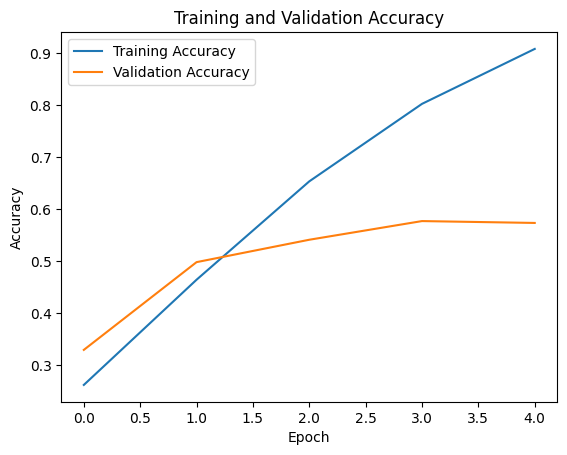

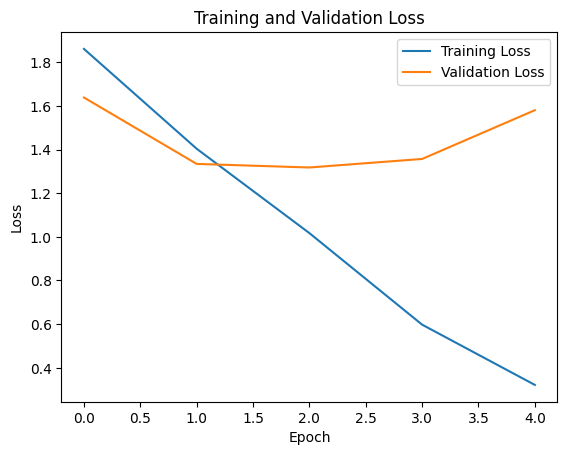

In [ ]:
# Assuming you have the training history from the 'train_history' variable
train_accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']
train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

# Plotting the accuracy curves
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plotting the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
